In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 讀取資料
data = pd.read_csv('diet_data_cleaned.csv')

# 假設資料中有一個 'ID' 欄位，需將其移除
# 如果沒有，請忽略此步驟
if 'ID' in data.columns:
    data_features = data.drop(columns=['ID'])
else:
    data_features = data.copy()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# 對 k=46 作主成分分析
k = 46
pca = PCA(n_components=k, random_state=42)

# 擬合並轉換資料
data_pca = pca.fit_transform(data_scaled)

# 獲取解釋變異量比例
explained_variance_ratio = pca.explained_variance_ratio_

# 累積解釋變異量比例
cumulative_variance = explained_variance_ratio.cumsum()
print(f'主成分數量: {k}')
print(f'每個主成分的解釋變異量比例: {explained_variance_ratio}')
print(f'累積解釋變異量比例: {cumulative_variance[-1]:.2f}')


主成分數量: 46
每個主成分的解釋變異量比例: [0.06392437 0.03932752 0.02990745 0.02612119 0.02438684 0.02244535
 0.02220158 0.02139047 0.02083049 0.0203567  0.02021922 0.01979296
 0.01937912 0.01922322 0.01902668 0.01888698 0.01860269 0.01849215
 0.01831561 0.01819705 0.01812335 0.01803475 0.01779908 0.01774478
 0.01763921 0.01753548 0.01745119 0.0172749  0.01721027 0.01709388
 0.01706698 0.01688572 0.016779   0.01672873 0.01654739 0.01642984
 0.0163266  0.01614563 0.01607909 0.01603127 0.01596709 0.01570462
 0.01544203 0.01535039 0.01504596 0.01477049]
累積解釋變異量比例: 0.91


未標準化

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 讀取資料
data = pd.read_csv('diet_data_cleaned.csv')

# 假設資料中有一個 'ID' 欄位，需將其移除
# 如果沒有，請忽略此步驟
if 'ID' in data.columns:
    data_features = data.drop(columns=['ID'])
else:
    data_features = data.copy()

# 對 k=46 作主成分分析（未標準化）
k = 35
pca = PCA(n_components=k, random_state=42)

# 擬合並轉換資料
data_pca = pca.fit_transform(data_features)

# 獲取解釋變異量比例
explained_variance_ratio = pca.explained_variance_ratio_

# 累積解釋變異量比例
cumulative_variance = explained_variance_ratio.cumsum()
print(f'主成分數量: {k}')
print(f'每個主成分的解釋變異量比例: {explained_variance_ratio}')
print(f'累積解釋變異量比例: {cumulative_variance[-1]:.2f}')

主成分數量: 35
每個主成分的解釋變異量比例: [0.10893982 0.07528588 0.05853926 0.05089324 0.04866443 0.04533486
 0.04086144 0.03927631 0.0329899  0.02912633 0.02647909 0.02480371
 0.0242478  0.02181494 0.02149683 0.02003904 0.01940114 0.01664725
 0.01654043 0.015539   0.01447216 0.01401037 0.01379677 0.01322563
 0.01203627 0.0118873  0.01165267 0.01096861 0.010801   0.01040202
 0.00992942 0.00949684 0.00915606 0.00898448 0.00870989]
累積解釋變異量比例: 0.91


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 讀取資料
data = pd.read_csv('diet_data_cleaned.csv')

# 假設資料中有一個 'ID' 欄位，需將其移除
# 如果沒有，請忽略此步驟
data_features = data.drop(columns=['ID'])

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# 將標準化後的資料轉換回 DataFrame（可選）
data_scaled_df = pd.DataFrame(data_scaled, columns=data_features.columns)

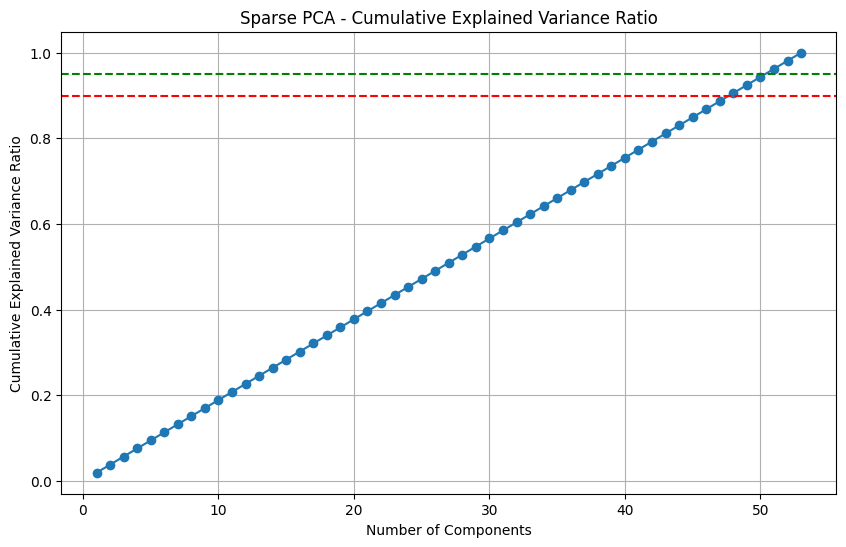

In [10]:
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
import numpy as np

# 設定最大主成分數量（例如 53）
max_components = 53
sparse_pca = SparsePCA(n_components=max_components, random_state=42, alpha=1, ridge_alpha=0.01)

# 擬合並轉換資料
sparse_pca.fit(data_scaled)
data_sparse_pca = sparse_pca.transform(data_scaled)

# 獲取每個主成分的解釋變異量（SparsePCA 不直接提供）
# 我們可以使用投影後的數據來近似計算
explained_variance = np.var(data_sparse_pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# 繪製解釋變異量比例圖
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Sparse PCA - Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [11]:
# 計算累積解釋變異量比例
cumulative_variance = np.cumsum(explained_variance_ratio)

# 設定解釋變異量的閾值（例如 90%）
threshold = 0.90

# 找到第一個累積解釋變異量超過閾值的位置
k = np.argmax(cumulative_variance >= threshold) + 1
print(f'選擇的主成分數量 k: {k}')
print(f'累積解釋變異量比例: {cumulative_variance[k-1]:.2f}')

選擇的主成分數量 k: 48
累積解釋變異量比例: 0.91


每個主成分的解釋變異量比例:
主成分 1: 0.0639
主成分 2: 0.0393
主成分 3: 0.0299
主成分 4: 0.0261
主成分 5: 0.0244
主成分 6: 0.0224
主成分 7: 0.0222
主成分 8: 0.0214
主成分 9: 0.0208
主成分 10: 0.0204
主成分 11: 0.0202
主成分 12: 0.0198
主成分 13: 0.0194
主成分 14: 0.0192
主成分 15: 0.0190
主成分 16: 0.0189
主成分 17: 0.0186
主成分 18: 0.0185
主成分 19: 0.0183
主成分 20: 0.0182
主成分 21: 0.0181
主成分 22: 0.0180
主成分 23: 0.0178
主成分 24: 0.0177
主成分 25: 0.0176
主成分 26: 0.0175
主成分 27: 0.0175
主成分 28: 0.0173
主成分 29: 0.0172
主成分 30: 0.0171
主成分 31: 0.0171
主成分 32: 0.0169
主成分 33: 0.0168
主成分 34: 0.0167
主成分 35: 0.0165
主成分 36: 0.0164
主成分 37: 0.0163
主成分 38: 0.0161
主成分 39: 0.0161
主成分 40: 0.0160
主成分 41: 0.0160
主成分 42: 0.0157
主成分 43: 0.0154
主成分 44: 0.0154
主成分 45: 0.0150
主成分 46: 0.0148
主成分 47: 0.0141
主成分 48: 0.0137
主成分 49: 0.0132
主成分 50: 0.0121
主成分 51: 0.0119
主成分 52: 0.0108
主成分 53: 0.0099


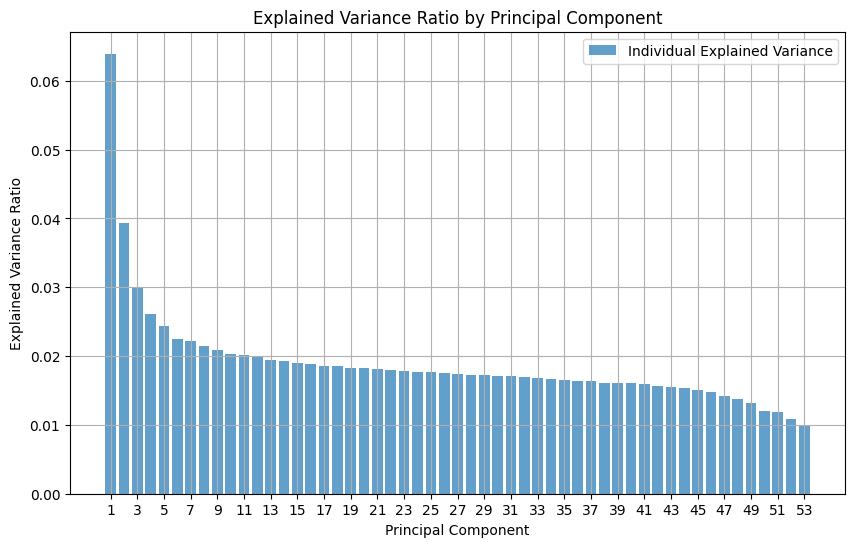

In [11]:
# 獲取每個主成分的解釋變異量比例
explained_variance_ratio = pca.explained_variance_ratio_

# 將每個主成分的解釋變異量比例列出
print("每個主成分的解釋變異量比例:")
for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f"主成分 {i}: {variance:.4f}")

# 視覺化每個主成分的解釋變異量比例
plt.figure(figsize=(10, 6))
plt.bar(range(1, max_components + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, max_components + 1, 2))  # 每隔 2 個主成分顯示刻度
plt.legend()
plt.grid(True)
plt.show()

In [12]:
cumulative_variance = np.cumsum(explained_variance_ratio)
threshold = 0.90
k = np.argmax(cumulative_variance >= threshold) + 1  # 找到累積解釋變異量超過 90% 的主成分數量
print(f'累積解釋變異量達到 90% 的主成分數量為: {k}')
print(f'累積解釋變異量: {cumulative_variance[k-1]:.2f}')


累積解釋變異量達到 90% 的主成分數量為: 46
累積解釋變異量: 0.91


In [5]:
# 提取前 k 個主成分的特徵權重
components = pca.components_[:k]

# 將權重矩陣轉為 DataFrame，便於查看和解釋
components_df = pd.DataFrame(components, columns=data_features.columns)

# 查看前 k 個主成分的稀疏特徵
print(components_df)


      Stewed     Prune     Dried     Mixed     Apple    Banana     Berry  \
0   0.056411  0.053807  0.087160  0.045514  0.085353  0.082184  0.133297   
1   0.068105  0.028299  0.020095 -0.002626  0.022730  0.000651 -0.035367   
2  -0.003469 -0.025012 -0.009977 -0.039177 -0.088178 -0.086081 -0.082804   
3   0.009193  0.213133  0.224599  0.053139  0.184273  0.264064  0.234154   
4  -0.005151  0.072463  0.138790 -0.166576  0.466044  0.374766 -0.293260   
5  -0.282358  0.011772  0.064251  0.205095 -0.076996  0.064955 -0.061539   
6   0.078201 -0.037912  0.022703 -0.081857  0.079095  0.024403 -0.030414   
7   0.051535 -0.168769 -0.194213 -0.222283  0.027234  0.079879  0.083880   
8   0.135004  0.528067  0.449249  0.099459 -0.196005 -0.087654  0.064196   
9   0.143855  0.088095  0.098420  0.265323  0.009279 -0.114833 -0.110836   
10 -0.222133 -0.262223 -0.221908 -0.161066 -0.001065  0.084628  0.057270   
11 -0.181400 -0.046982  0.034839 -0.021527 -0.013651  0.122604  0.110892   
12 -0.326536

In [6]:
# 篩選並解釋每個主成分的重要特徵
for i in range(k):
    component = components_df.iloc[i]
    # 按權重絕對值排序
    important_features = component[component != 0].sort_values(ascending=False, key=abs)
    print(f"主成分 {i+1} 的重要特徵:")
    print(important_features)
    print("\n")


主成分 1 的重要特徵:
Lettuce            0.323163
Freshtomato        0.304279
Onion              0.301085
Sweetpepper        0.296329
Cucumber           0.292182
Sidesalad          0.268956
Celery             0.222265
Garlic             0.208199
Beetroot           0.197844
Mushroom           0.172768
Carrot             0.164014
Watercress         0.163332
Courgette          0.143011
Berry              0.133297
Tinnedtomato       0.128067
Spinach            0.117227
Avocado            0.115317
Pulses             0.106785
Coleslaw           0.103301
Othervegetables    0.102698
Grape              0.100535
Vegetablepieces    0.091959
Broccoli           0.089322
Dried              0.087160
Apple              0.085353
Banana             0.082184
Leek               0.080895
Sweetcorn          0.080222
Peach_nectarine    0.077600
Pineapple          0.072785
Butternutsquash    0.070072
Cabbage_kale       0.068691
Other              0.068205
Greenbean          0.067741
Pear               0.067693
Orange 

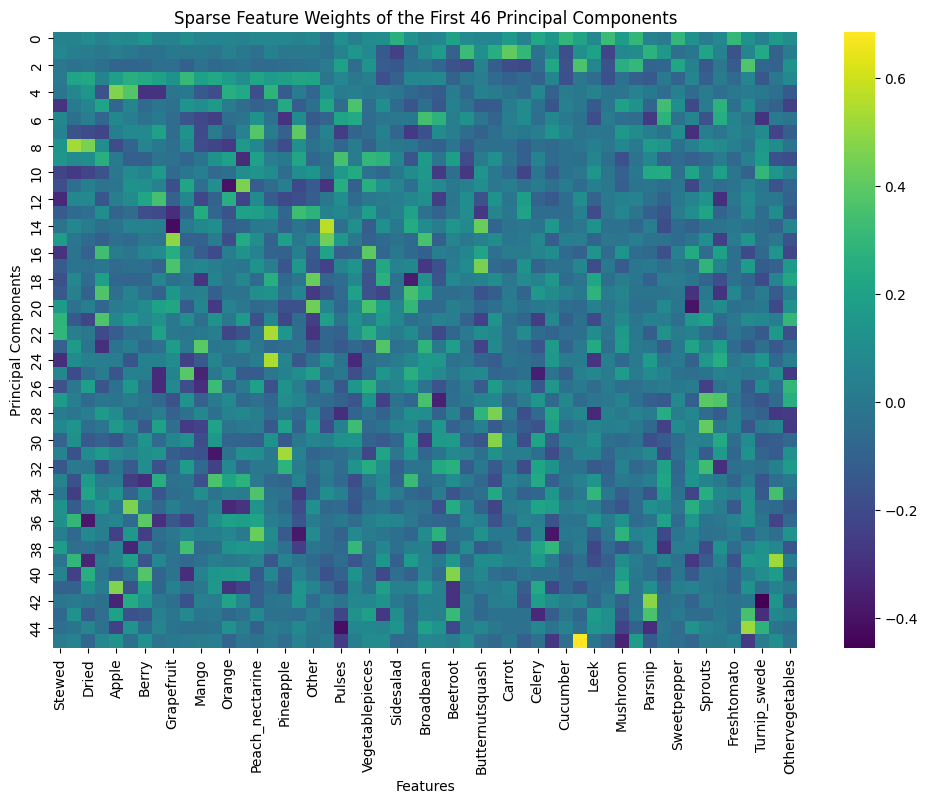

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 繪製熱圖，展示主成分的特徵權重
plt.figure(figsize=(12, 8))
sns.heatmap(components_df.iloc[:k], cmap="viridis", annot=False, fmt=".2f")
plt.title(f"Sparse Feature Weights of the First {k} Principal Components")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()


In [9]:
# 檢視前幾個主成分的稀疏性
for i in range(10):
    component = pca.components_[i]
    non_zero = np.sum(component != 0)
    total = len(component)
    contributing_features = data_features.columns[component != 0]
    print(f'主成分 {i+1}: 非零係數數量 = {non_zero}/{total}')
    print(f'貢獻變數: {list(contributing_features)}\n')

主成分 1: 非零係數數量 = 53/53
貢獻變數: ['Stewed', 'Prune', 'Dried', 'Mixed', 'Apple', 'Banana', 'Berry', 'Cherry', 'Grapefruit', 'Grape', 'Mango', 'Melon', 'Orange', 'Satsuma', 'Peach_nectarine', 'Pear', 'Pineapple', 'Plum', 'Other', 'Bakedbean', 'Pulses', 'Mixedvegetable', 'Vegetablepieces', 'Coleslaw', 'Sidesalad', 'Avocado', 'Broadbean', 'Greenbean', 'Beetroot', 'Broccoli', 'Butternutsquash', 'Cabbage_kale', 'Carrot', 'Cauliflower', 'Celery', 'Courgette', 'Cucumber', 'Garlic', 'Leek', 'Lettuce', 'Mushroom', 'Onion', 'Parsnip', 'Pea', 'Sweetpepper', 'Spinach', 'Sprouts', 'Sweetcorn', 'Freshtomato', 'Tinnedtomato', 'Turnip_swede', 'Watercress', 'Othervegetables']

主成分 2: 非零係數數量 = 53/53
貢獻變數: ['Stewed', 'Prune', 'Dried', 'Mixed', 'Apple', 'Banana', 'Berry', 'Cherry', 'Grapefruit', 'Grape', 'Mango', 'Melon', 'Orange', 'Satsuma', 'Peach_nectarine', 'Pear', 'Pineapple', 'Plum', 'Other', 'Bakedbean', 'Pulses', 'Mixedvegetable', 'Vegetablepieces', 'Coleslaw', 'Sidesalad', 'Avocado', 'Broadbean', 'Gree

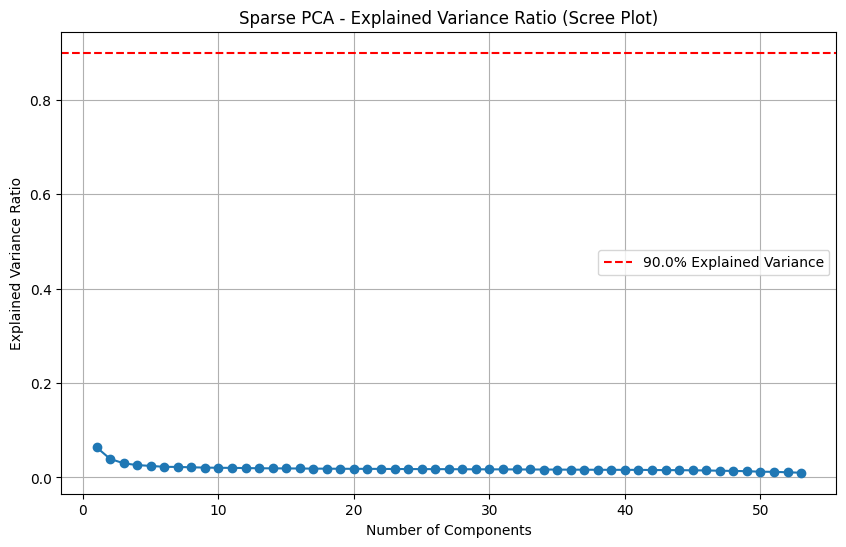

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Sparse PCA - Explained Variance Ratio (Scree Plot)')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

Alpha: 0.5, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91
Alpha: 1, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91
Alpha: 2, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91
Alpha: 3, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91
Alpha: 4, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91


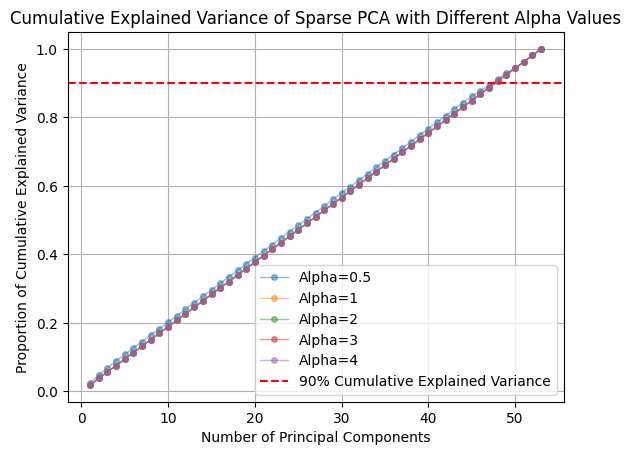

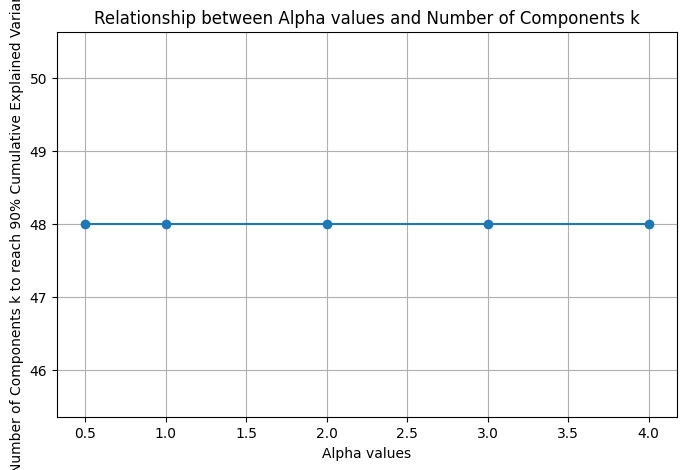

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
data = pd.read_csv('diet_data_cleaned.csv')

# 移除 'ID' 欄位（如有）
data_features = data.drop(columns=['ID'])

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# 設定最大主成分數量
max_components = 53  # 原始變數數量
threshold = 0.90      # 90% 累積解釋變異量

# 設定不同的 alpha 值進行實驗
alpha_values = [0.5, 1, 2, 3, 4]
results = {}

for alpha in alpha_values:
    # 初始化 Sparse PCA
    sparse_pca = SparsePCA(n_components=max_components, random_state=42, alpha=alpha, ridge_alpha=0.01)
    
    # 擬合並轉換資料
    data_sparse_pca = sparse_pca.fit_transform(data_scaled)
    
    # 計算解釋變異量比例
    explained_variance = np.var(data_sparse_pca, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    # 找到達到 90% 的 k 值
    k = np.argmax(cumulative_variance >= threshold) + 1
    results[alpha] = k
    
    print(f'Alpha: {alpha}, 選擇的主成分數量 k: {k}, 累積解釋變異量: {cumulative_variance[k-1]:.2f}')
    
    # 繪製每個 alpha 的累積解釋變異量
    plt.plot(range(1, max_components + 1), cumulative_variance, marker='o', label=f'Alpha={alpha}', alpha=0.5, linewidth=1, markersize=4)

# Plot the 90% threshold line
plt.axhline(y=threshold, color='r', linestyle='--', label='90% Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Cumulative Explained Variance')
plt.title('Cumulative Explained Variance of Sparse PCA with Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()

# 繪製 alpha 與 k 值的關係
alphas = list(results.keys())
ks = list(results.values())

plt.figure(figsize=(8, 5))
plt.plot(alphas, ks, marker='o', )
plt.xlabel('Alpha values')
plt.ylabel('Number of Components k to reach 90% Cumulative Explained Variance')
plt.title('Relationship between Alpha values and Number of Components k')
plt.grid(True)
plt.show()

max_components=49, 選擇的主成分數量 k: 45, 累積解釋變異量: 0.91
max_components=50, 選擇的主成分數量 k: 46, 累積解釋變異量: 0.91
max_components=51, 選擇的主成分數量 k: 47, 累積解釋變異量: 0.92
max_components=52, 選擇的主成分數量 k: 47, 累積解釋變異量: 0.90
max_components=53, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91


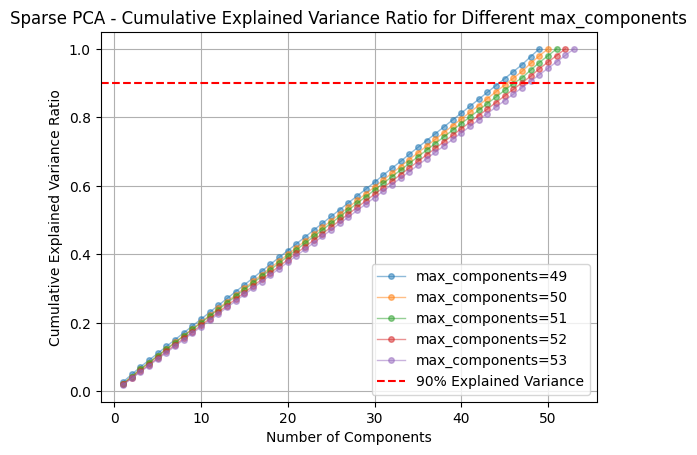

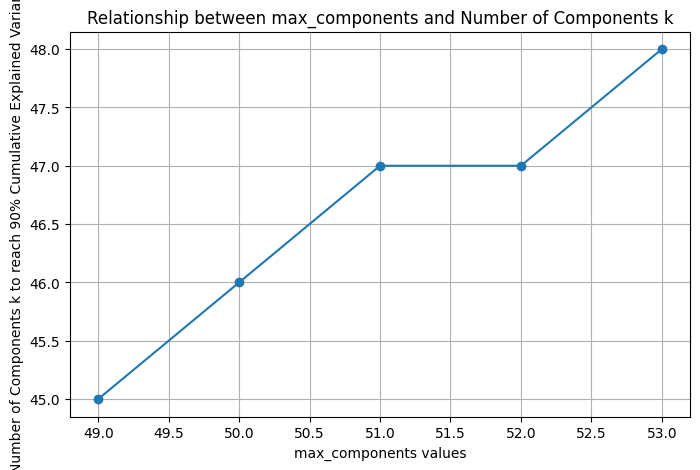

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
import numpy as np

# 讀取資料
data = pd.read_csv('diet_data_cleaned.csv')

# 移除 'ID' 欄位（如有）
data_features = data.drop(columns=['ID'])

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# 設定不同的 max_components 值
max_components_values = [49, 50, 51, 52, 53]  # 包含原始變數數量
alpha = 1
ridge_alpha = 0.01
threshold = 0.90

results = {}

for max_components in max_components_values:
    # 初始化 Sparse PCA
    sparse_pca = SparsePCA(n_components=max_components, random_state=42, alpha=alpha, ridge_alpha=ridge_alpha)
    
    # 擬合並轉換資料
    data_sparse_pca = sparse_pca.fit_transform(data_scaled)
    
    # 計算解釋變異量比例
    explained_variance = np.var(data_sparse_pca, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    # 找到達到 90% 的 k 值
    if np.any(cumulative_variance >= threshold):
        k = np.argmax(cumulative_variance >= threshold) + 1
    else:
        k = max_components  # 如果未達到閾值，設定 k 為 max_components
    results[max_components] = k
    
    print(f'max_components={max_components}, 選擇的主成分數量 k: {k}, 累積解釋變異量: {cumulative_variance[k-1]:.2f}')
    
    # 繪製累積解釋變異量
    plt.plot(range(1, max_components + 1), cumulative_variance, marker='o', label=f'max_components={max_components}', alpha=0.5, linewidth=1, markersize=4)

# 繪製 90% 閾值線
plt.axhline(y=threshold, color='r', linestyle='--', label='90% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Sparse PCA - Cumulative Explained Variance Ratio for Different max_components')
plt.legend()
plt.grid(True)
plt.show()

# 繪製 max_components 與 k 的關係
plt.figure(figsize=(8, 5))
plt.plot(max_components_values, [results[m] for m in max_components_values], marker='o')
plt.xlabel('max_components values')
plt.ylabel('Number of Components k to reach 90% Cumulative Explained Variance')
plt.title('Relationship between max_components and Number of Components k')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 使用 Sparse PCA 的前 k 個主成分
data_sparse_pca_selected = data_sparse_pca[:, :k]

# 設定可能的 k 值範圍（例如 2 到 20）
k_values = range(2, 21)
sse = []  # 紀錄每個 k 的 SSE
silhouette_scores = []  # 紀錄每個 k 的輪廓係數

# 嘗試不同的 k 值
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_sparse_pca_selected)
    sse.append(kmeans.inertia_)
    
    # 計算輪廓係數
    silhouette_avg = silhouette_score(data_sparse_pca_selected, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# 繪製肘部法則圖（SSE）
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# 繪製輪廓係數圖
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()
